# Premium Prediction - Linear Regression

### Project Objective

The objective of this project is to develop a predictive model that estimates insurance premiums based on demographic information and health characteristics. By applying linear regression techniques, we aim to provide accurate premium estimates, which can assist individuals and insurance providers in making informed decisions regarding insurance coverage.

### Data Source

The data for this project was obtained from the Kaggle dataset "Medical cost personal dataset". This dataset contains information on over 1300 individuals, including their age, gender, region, smoker status, number of children, BMI, and insurance charges. The dataset is available at the following link:

https://www.kaggle.com/datasets/mirichoi0218/insurance

## 1. Reading and Understanding the Data

In [97]:
#Import the initial libraries for this project

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [98]:
# Read the dataset
insurance = pd.read_csv("insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


This dataset comprises information on individuals, with 'charges' as the target variable, and features including 'age', 'sex', 'bmi', 'children', 'smoker', and 'region'.

Categorical Features :
For our categorical analysis, we will utilize three primary features:
* Sex
* Smoker
* Region

### 2. Data Inspection

In [39]:
# number of rows and columns
insurance.shape

(1338, 7)

The dataset contain 1338 rows and 7 columns

In [40]:
# getting some info about the dataset
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 3. Data Analysis

In [42]:
# Checking for missing values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values in the dataset

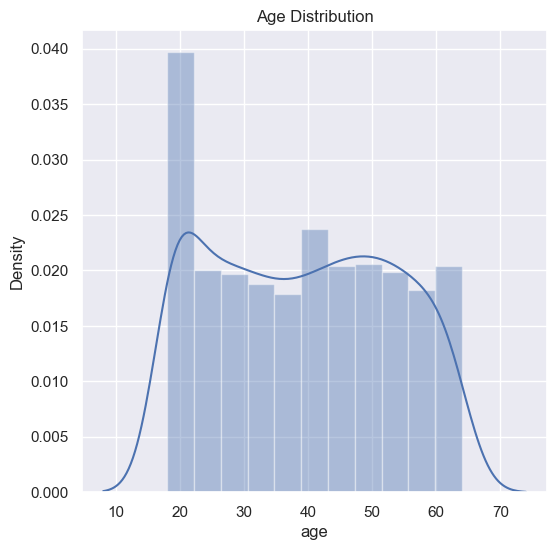

In [18]:
# distribution of the age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance["age"])
plt.title("Age Distribution");

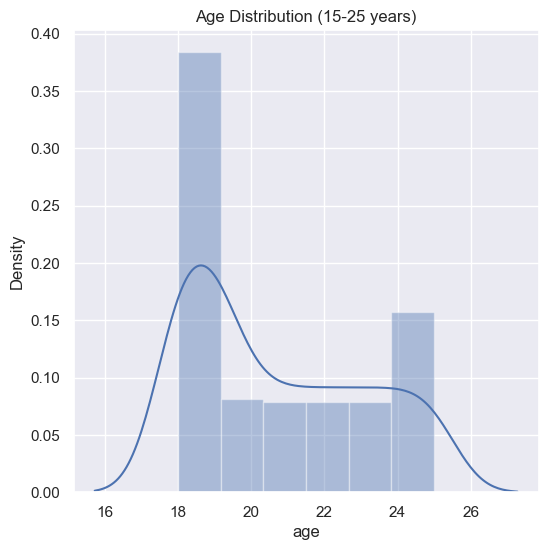

In [100]:
# distribution of the age between 15 to 25
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance[(insurance["age"] >= 15) & (insurance["age"] <= 25)]["age"])
plt.title("Age Distribution (15-25 years)");

Observation: The highest probability is coming from age 18 to 19

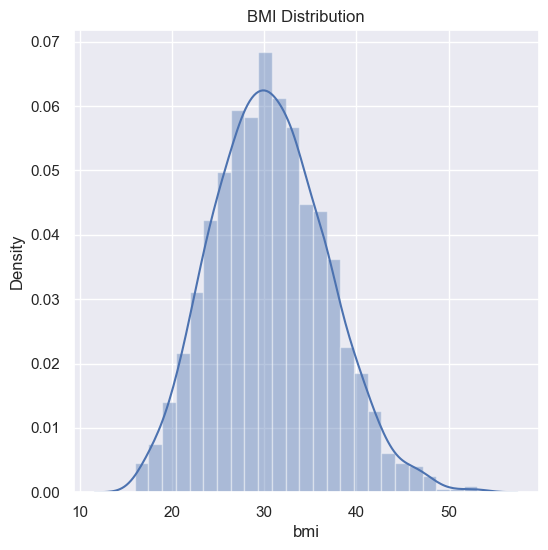

In [101]:
# distribution of BMI
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance["bmi"])
plt.title("BMI Distribution");

Normal BMI Ramge -> 18.5 to 24.9

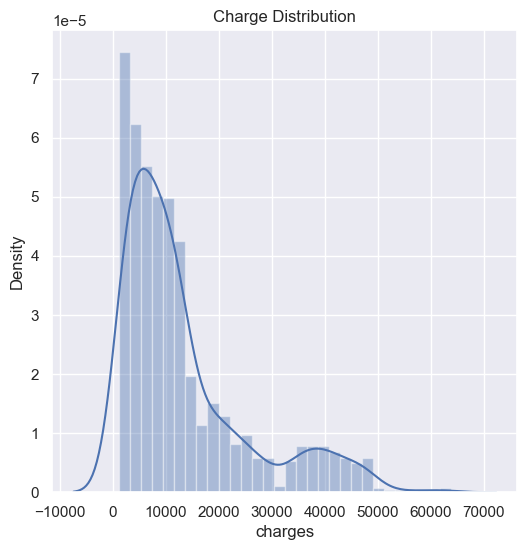

In [102]:
# distribution of charges value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance["charges"])
plt.title("Charge Distribution");

In [103]:
# count of sex
insurance["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

Male and female gender were almost equal

In [104]:
# count of children
insurance["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

major part of data set contain no children or one children

In [105]:
# count of region
insurance["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### 4. Data Pre-Processing

Encoding the categorical features

In [106]:
# Encoding sex column
insurance.replace({"sex":{"male":0, "female":1}}, inplace=True)

# Encoding smoker column 
insurance.replace({"smoker":{"yes":0, "no":1}}, inplace=True)

# Encoding region columns 
insurance.replace({"region":{"southeast":0, "southwest":1, "northeast":2, "northwest":3}}, inplace=True)

In [107]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


### 5. Model Building

Linear regression is a statistical method that models the relationship between a dependent variable (y) and one or more independent variables (x). It is a supervised learning algorithm, which means that it learns from a dataset of labeled examples where the dependent variable is known for each independent variable.

Linear regression is a powerful tool for predicting the value of the dependent variable based on the values of the independent variables. It can be used in a variety of applications, such as predicting the price of a house, the cost of insurance, or the risk of a customer churning.

The linear regression model is a linear equation, which means that it can be represented by the following formula:

y = mx + b
where:

y is the dependent variable
x is the independent variable
m is the slope of the line
b is the y-intercept of the line
The slope of the line represents the change in the dependent variable for every unit change in the independent variable. The y-intercept of the line represents the value of the dependent variable when the independent variable is equal to 0.

### Split the data into Traning and Test

In [108]:
X = insurance.drop(columns='charges', axis=1)
y = insurance['charges']

##### Training and Testing Data Split

The next step is to partition your dataset into training and testing subsets. To achieve this, you'll utilize the train_test_split function from the sklearn.model_selection library. Typically, it's recommended to allocate 80% of the data to the training dataset and reserve the remaining 20% for the testing dataset as a common practice



In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

In [110]:
# shape of the splits
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


##### Model Training 

In [111]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score of testing model: {r2_test}")

Mean Squared Error (MSE): 30568010.388406407
R-squared (R2) Score of testing model: 0.8000725951720891


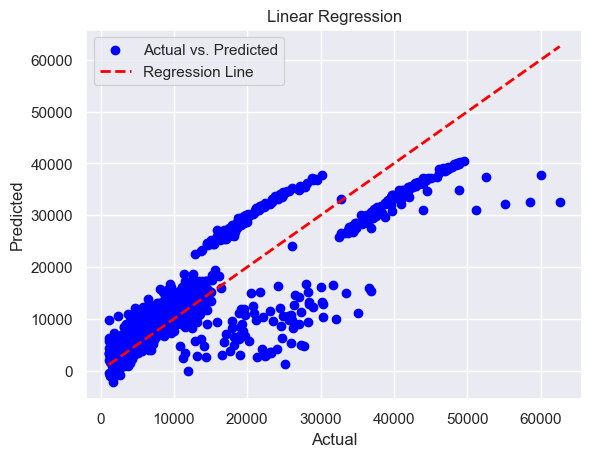

In [112]:
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add the regression line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Regression Line')

plt.title('Linear Regression')
plt.legend()
plt.show()

In [113]:
import statsmodels.api as sm

# Add a constant (intercept) to the predictor variable
X_train = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train).fit()



# Get the summary of the regression
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     496.6
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          3.61e-304
Time:                        15:13:10   Log-Likelihood:                -10857.
No. Observations:                1070   AIC:                         2.173e+04
Df Residuals:                    1063   BIC:                         2.176e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.06e+04   1253.197      8.459      0.0

From the above regression summary, here are some key statistics to focus on:

1. Coefficients and Significance (P-values):

* const: The intercept (constant) coefficient is approximately 10,600.
* age: The coefficient for the predictor variable 'age' is approximately 256.15.
* sex: The coefficient for the predictor variable 'sex' is approximately 70.08. However, its p-value is 0.854, indicating that it is not statistically significant.
* bmi: The coefficient for the predictor variable 'bmi' is approximately 341.28.
* children: The coefficient for the predictor variable 'children' is approximately 441.11.
* smoker: The coefficient for the predictor variable 'smoker' is approximately -23,520, indicating a strong negative relationship with the target variable.
* region: The coefficient for the predictor variable 'region' is approximately 280.38, but its p-value is 0.102, suggesting it may not be statistically significant.
Overall, most of the coefficients are statistically significant except for 'sex' and 'region'.

2. R-squared (R²):

* The R-squared value is approximately 0.737, indicating that about 73.7% of the variance in the dependent variable ('charges') can be explained by the independent variables.

3. F Statistic and its Significance:

* The F-statistic is 496.6, and the associated p-value is very close to 0 (3.61e-304), indicating that the overall model is statistically significant. This means that at least one independent variable is related to the dependent variable.

4. Additional Statistics:

* The summary includes other statistics like the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), which can provide insights into the quality and assumptions of the regression model.
In summary, the provided linear regression model is statistically significant, and most of the coefficients are significant in predicting 'charges'. The R-squared value of 0.737 suggests that the model explains a substantial portion of the variance in 'charges', and the F-statistic further supports the overall significance of the model.

The regression equation can be written as:

###### Charges=10,600+256.15×age+70.08×sex+341.28×bmi+441.11×children−23,520×smoker +280.38×region

Please note that the coefficients represent the change in 'charges' for a one-unit change in the respective predictor variable, holding other variables constant.

### 6. Model Performance Evaluation 

To evaluate the performance of a linear regression model, there are several common metrics and techniques you can use. Here are some of the key methods to assess the performance of the model:

#### Model Performance Evaluation on Training dataset

###### 1. Mean Squared Error (MSE):

Calculate the mean squared error between the actual and predicted values. Lower MSE indicates better performance.

In [114]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred_train)
print(mse)

38107541.32762886


###### 2. R-squared (R²) Score:

Determine the coefficient of determination, which measures the proportion of the variance in the dependent variable explained by the model. A higher R² score is better.

In [115]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_train)
print(r2)

0.7370419557075617


###### 3. Residual Analysis:

Examine the distribution of the residuals (differences between actual and predicted values). A random and normally distributed set of residuals is a good sign.

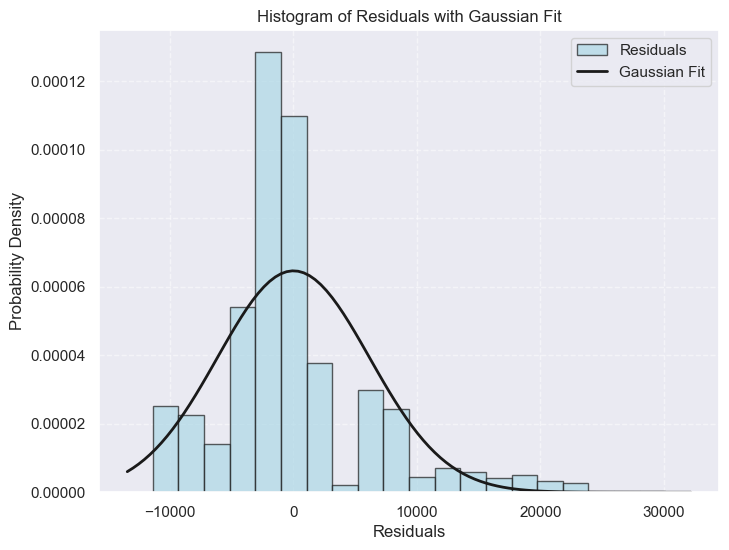

In [116]:
from scipy.stats import norm

# Calculate the residuals
residuals = y_train - y_pred_train

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, density=True, edgecolor='k', alpha=0.7, color='lightblue', label='Residuals')

# Fit a Gaussian distribution (PDF) to the residuals
mu, std = norm.fit(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Overlay the fitted curve on the histogram
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Residuals')
plt.ylabel('Probability Density')
plt.title('Histogram of Residuals with Gaussian Fit')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

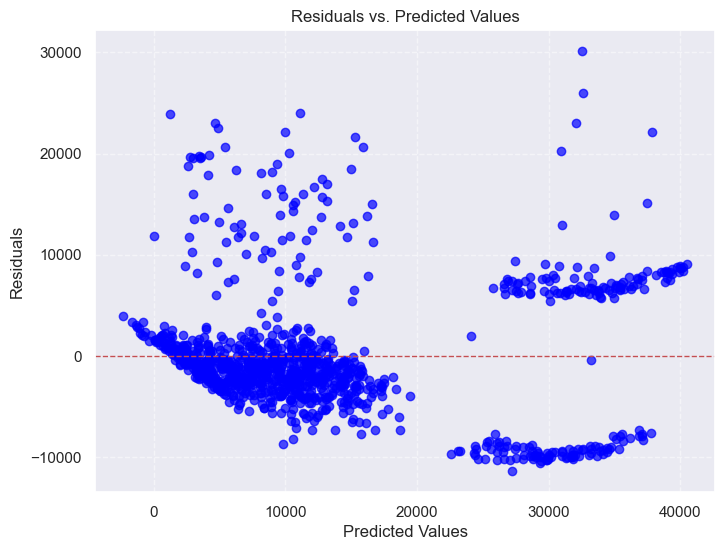

In [84]:
# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### Model Performance Evaluation on Testing dataset

After assessing the model on the training data, evaluate its performance on a test dataset. This gives you an indication of how well the model will perform in the real world.

###### 1. Mean Squared Error (MSE):

In [87]:
mse_test = mean_squared_error(y_test, y_pred_test)
print(mse_test)

30568010.388406407


###### 2. R-squared (R²) Score:

In [89]:
r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

0.8000725951720891


Observation: The model is giving better result of R-squared on testing set

###### 3. Residual Analysis:

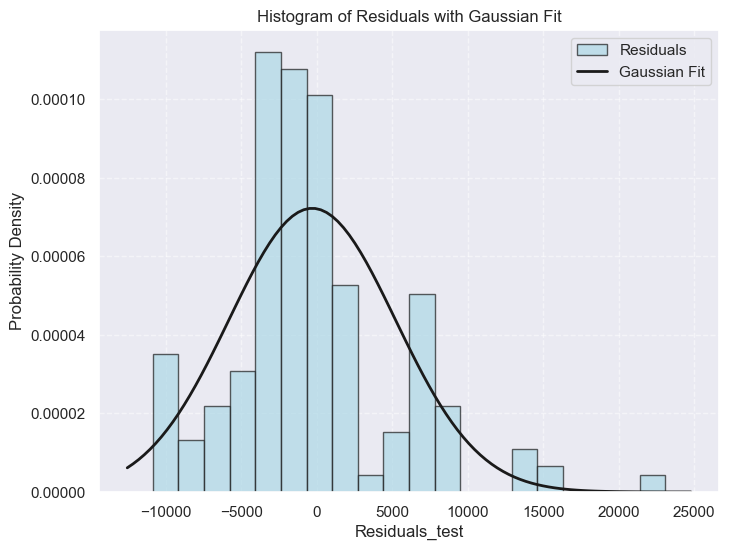

In [117]:
from scipy.stats import norm

# Calculate the residuals
residuals_test = y_test - y_pred_test

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals_test, bins=20, density=True, edgecolor='k', alpha=0.7, color='lightblue', label='Residuals')

# Fit a Gaussian distribution (PDF) to the residuals
mu, std = norm.fit(residuals_test)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Overlay the fitted curve on the histogram
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Residuals_test')
plt.ylabel('Probability Density')
plt.title('Histogram of Residuals with Gaussian Fit')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

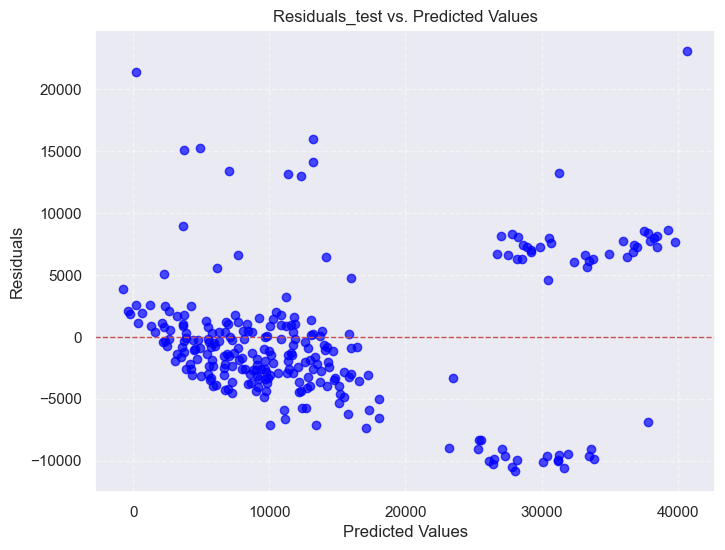

In [118]:
# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals_test, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals_test vs. Predicted Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### Conclusion:


The linear regression model demonstrates a strong fit to the data, explaining a substantial portion of the variance in insurance premiums. On the training data, it achieves an R-squared value of approximately 0.737, while on the testing data, the R-squared value is approximately 0.800. This suggests that the model effectively captures the underlying relationships.

It's important to note that certain features, such as 'sex' and 'region', may not hold significant predictive power for insurance premiums, as evidenced by their high p-values.

In the context of premium prediction, this model provides valuable insights for estimating insurance costs based on demographic and health characteristics. This information can be instrumental for both individuals and insurance providers in making well-informed decisions regarding insurance coverage.